### Spermarket_sales Exporatory Analysis


######  Details of each columns in the dataset
1. Invoice ID : Computer generated sales slip invoice identification number
2. Branch : Branch of supercenter (3 branches are available identified by A, B and C).
3. City : Location of supercenters
4. Customer Type : Type of customers, recorded by Members for customers using member card and Normal for without member card
5. Gender : Gender type of customer
6. Product line : General item categorization groups
7. Unit price : Price of each product in $
8. Quantity : Number of products purchased by customer
9. Tax 5% :5% tax fee for customer buying
10. Total :Total price including tax
11. Date : Date of purchase
12. Time : Purchase Time
13. Payment : Payment used by customers for purchase
14. cogs :Cost of goods sold
15. gross margin percentage : Gross margin percentage
16. gross income :gross income
17. Rating :Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

Source = "https://www.kaggle.com/aungpyaeap/supermarket-sales"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [44]:
df = pd.read_csv("supermarket_sales - Sheet1.csv")

In [3]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [45]:
df.columns = df.columns.str.replace(" ","_")

In [5]:
df.head()

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5%,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice_ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer_type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product_line             1000 non-null   object 
 6   Unit_price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax_5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross_margin_percentage  

In [7]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df=df.select_dtypes(include=numerics)
numeric_df.columns

Index(['Unit_price', 'Quantity', 'Tax_5%', 'Total', 'cogs',
       'gross_margin_percentage', 'gross_income', 'Rating'],
      dtype='object')

In [8]:
len(numeric_df.columns)

8

In [9]:
df.isnull().sum()

Invoice_ID                 0
Branch                     0
City                       0
Customer_type              0
Gender                     0
Product_line               0
Unit_price                 0
Quantity                   0
Tax_5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross_margin_percentage    0
gross_income               0
Rating                     0
dtype: int64

In [10]:
df.City.unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [11]:
df.City.value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

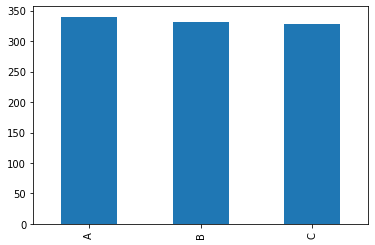

In [12]:
df.Branch.value_counts().plot(kind="bar")

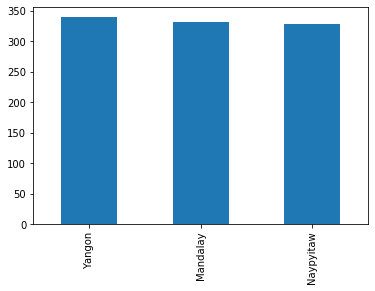

In [13]:
df.City.value_counts().plot(kind="bar")

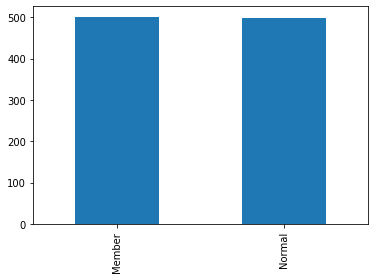

In [14]:
df.Customer_type.value_counts().plot(kind="bar")

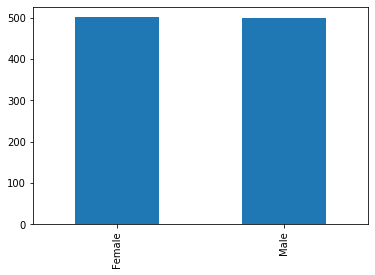

In [15]:
df.Gender.value_counts().plot(kind="bar")

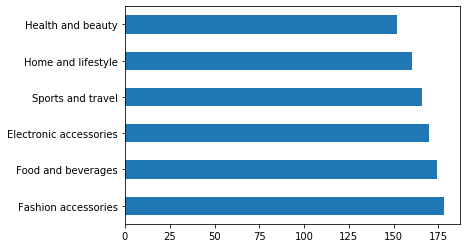

In [16]:
df.Product_line.value_counts().plot(kind="barh")

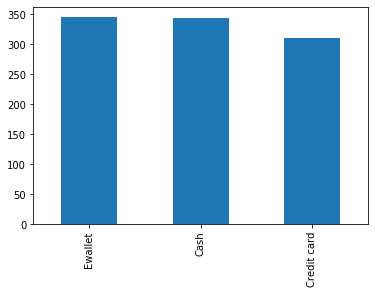

In [17]:
df.Payment.value_counts().plot(kind="bar")

In [18]:
df.describe()

,Unit_price,Quantity,Tax_5%,Total,cogs,gross_margin_percentage,gross_income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [19]:
numeric =list(numeric_df.columns)

In [20]:
sns.set_style("darkgrid")

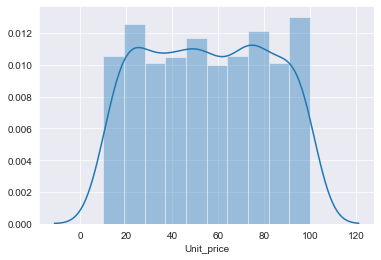

In [21]:
sns.distplot(df["Unit_price"],norm_hist=True)

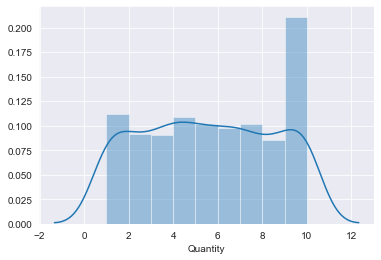

In [22]:
sns.distplot(df["Quantity"],norm_hist=True)

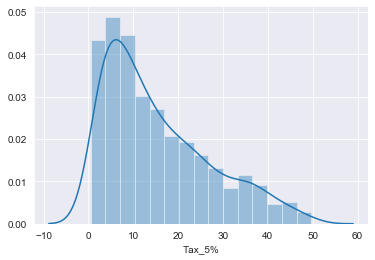

In [23]:
sns.distplot(df["Tax_5%"],norm_hist=True)

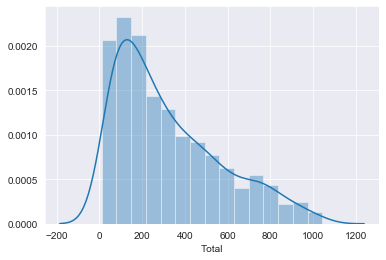

In [24]:
sns.distplot(df["Total"],norm_hist=True)

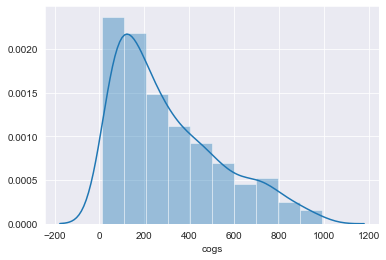

In [29]:
sns.distplot(df["cogs"],bins=10,norm_hist=True)

C:\Users\Nishanth\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


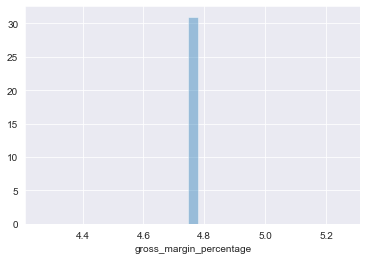

In [26]:
sns.distplot(df["gross_margin_percentage"],norm_hist=True)

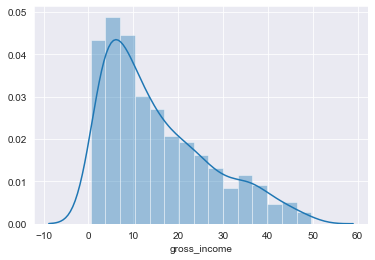

In [27]:
sns.distplot(df["gross_income"],norm_hist=True)

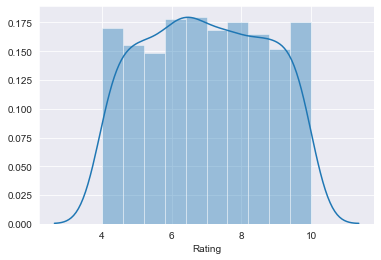

In [28]:
sns.distplot(df["Rating"],norm_hist=True)

In [85]:
df["Date_Time"]=df.Date+" "+df.Time

In [86]:
df["Date_Time"] = pd.to_datetime(df["Date_Time"])

In [87]:
df.Date_Time

0     2019-01-05 13:08:00
1     2019-03-08 10:29:00
2     2019-03-03 13:23:00
3     2019-01-27 20:33:00
4     2019-02-08 10:37:00
              ...        
995   2019-01-29 13:46:00
996   2019-03-02 17:16:00
997   2019-02-09 13:22:00
998   2019-02-22 15:33:00
999   2019-02-18 13:28:00
Name: Date_Time, Length: 1000, dtype: datetime64[ns]

In [96]:
df.Date_Time.dt.year.unique()

array([2019], dtype=int64)

In [100]:
df.Date_Time.dt.month.unique()

array([1, 3, 2], dtype=int64)

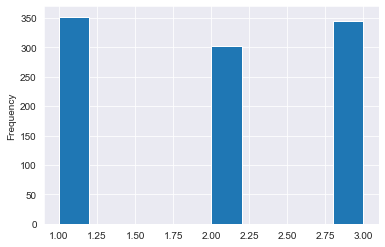

In [105]:
df.Date_Time.dt.month.plot(kind="hist")

In [109]:
df.Date_Time.dt.hour.unique()

array([13, 10, 20, 18, 14, 11, 17, 16, 19, 15, 12], dtype=int64)

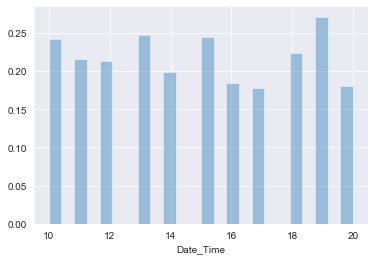

In [108]:
sns.distplot(df.Date_Time.dt.hour,bins=24,kde=False, norm_hist=True)

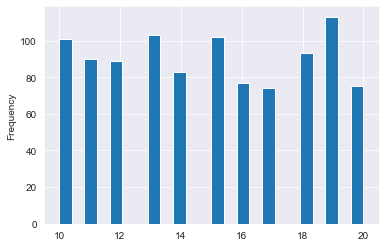

In [126]:
df.Date_Time.dt.hour.plot(kind="hist",bins=24)

In [120]:
print(df.Date_Time.dt.year.unique())
print(df.Date_Time.dt.month.unique())
print(df.Date_Time.dt.day.unique())
print(df.Date_Time.dt.hour.unique())

[2019]
[1 3 2]
[ 5  8  3 27 25 24 10 20  6  9 12  7 29 15 11  1 21 17  2 22 28 23  4 16
 19 14 13 26 18 30 31]
[13 10 20 18 14 11 17 16 19 15 12]


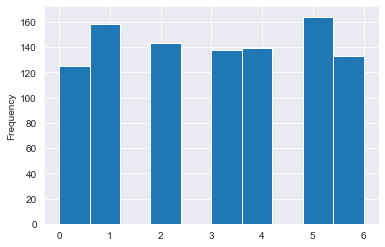

In [122]:
df.Date_Time.dt.dayofweek.plot(kind="hist")

In [123]:
saturday=df.Date_Time[df.Date_Time.dt.dayofweek == 5]

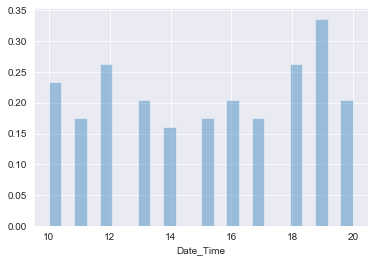

In [125]:
sns.distplot(saturday.dt.hour,kde=False,bins=24, norm_hist=True)

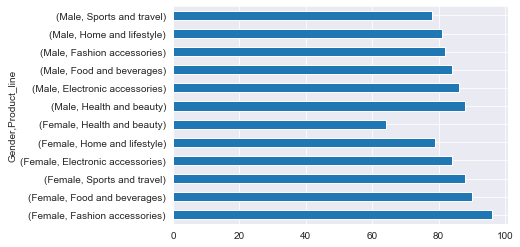

In [129]:
df.groupby("Gender").Product_line.value_counts().plot(kind="barh")

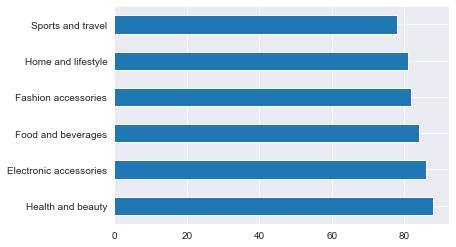

In [137]:
df[df["Gender"]=="Male"].Product_line.value_counts().plot(kind="barh")

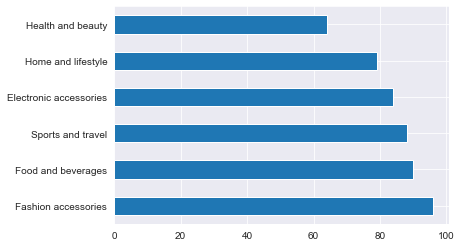

In [138]:
df[df["Gender"]=="Female"].Product_line.value_counts().plot(kind="barh")

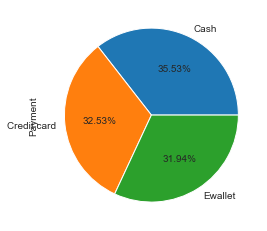

In [153]:
df[df["Gender"]=="Female"].Payment.value_counts().plot(kind="pie", y="Payment",autopct='%1.2f%%')

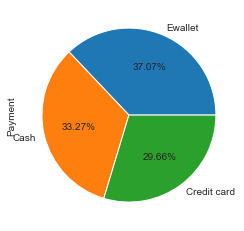

In [151]:
df[df["Gender"]=="Male"].Payment.value_counts().plot(kind="pie", y="Payment",autopct='%1.2f%%')

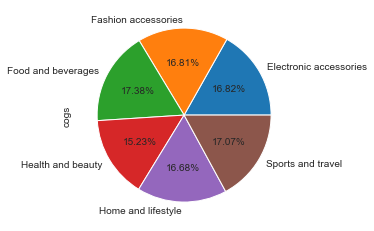

In [156]:
df.groupby("Product_line").cogs.sum().plot(kind="pie",autopct='%1.2f%%')

In [158]:
df.groupby("Product_line").gross_income.sum()

Product_line
Electronic accessories    2587.5015
Fashion accessories       2585.9950
Food and beverages        2673.5640
Health and beauty         2342.5590
Home and lifestyle        2564.8530
Sports and travel         2624.8965
Name: gross_income, dtype: float64

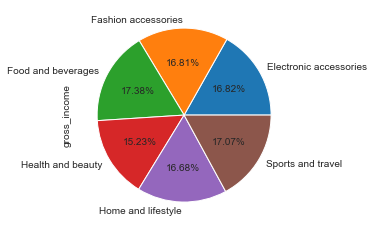

In [157]:
df.groupby("Product_line").gross_income.sum().plot(kind="pie",autopct='%1.2f%%')

In [161]:
df.groupby("Product_line").Rating.mean()

Product_line
Electronic accessories    6.924706
Fashion accessories       7.029213
Food and beverages        7.113218
Health and beauty         7.003289
Home and lifestyle        6.837500
Sports and travel         6.916265
Name: Rating, dtype: float64

### Inference from the Dtata

- Gross Margin percentage is same for all the products? Why?
- Data is present only for year 2019 and for the montsh of jan, Feb and march
- Every data consists between 10 Am to 9 pm .
- highest number of customer visiting the store is on weekends
- During 7pm more sale had happened.
- Male customer has purchased more product related to Health-beauty and Electronic accessories.
- Felmale customers had made larger purchase on Fashion accessories , Food and beverages.
- Most of the Payment mode by the Female customers are by cash nearly 36%
- Nearly 37% of the Male customer pay thorugh E-wallet.
- Usage of creadit card for the payment is more among the Female customers than Male.
- Food beverages and sports & travel has a combined revenue about 34%, which most sold.
- Food beverages and sports & travel stands top in gross income
- All the product line maintain the average rating around 7.
- 

In [166]:
import jovian

In [167]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/nishanth-k-s/supermarket-sales


'https://jovian.ml/nishanth-k-s/supermarket-sales'